# Plot the structure of the interior of a polytropi star

## This notebook plots the density profile of a polytropic star gives its density expression
## An example of the density profile for a polytropic star with index N = 1.5 and ratio rB/rA = 0.7 is given

The mesh number at r-direction is: 257
The mesh number at n-direction is: 257
The maximum radius is: 1.00007


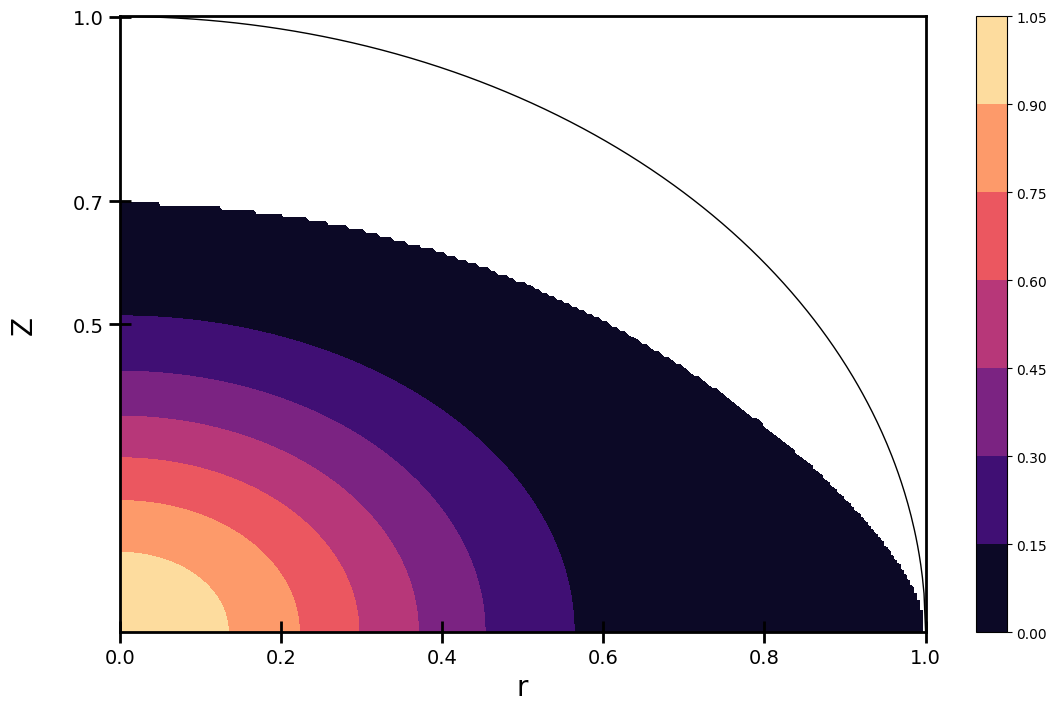

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sy
from sympy.utilities.lambdify import lambdify
import warnings

warnings.filterwarnings("ignore")

r=sy.Symbol('r')
n=sy.Symbol('n')
# Define the function in spherical coordinates
def f(r, n): 
    
    """
    *** INPUT THE DENSITY HERE ***
    
    """
    ρ = 34.9191937626327*(0.305405723777727*r**6 - r**5 + 0.994149698450362*r**4 - 0.032539523269972*r**3 + 0.0250914023447887*r**2*(1 - n**2) - 0.385710465078134*r**2 + 0.0936031637752284)**1.5
    
    return ρ


ω=sy.Symbol('ω')
z=sy.Symbol('z')

# convert sphericals to cylindricals
def den(ω, z):
    rad=(ω**2 + z**2)**(1/2)
    cos_theta=z/((ω**2+z**2)**(1/2))
    density=f(rad, cos_theta)
    return(density)

den_cart=lambdify((ω, z), den(ω, z))

NDIV=int(input('The mesh number at r-direction is:'))
KDIV=int(input("The mesh number at n-direction is:"))
i=np.array(list(range(1, NDIV+1)))
j=np.array(list(range(1, KDIV+1)))

rmax=float(input("The maximum radius is:"))
rj=rmax*((j-1)/(NDIV-1))
ni=(i-1)/(KDIV-1)
sin=np.sqrt(1-ni**2)
sin=np.flip(sin)

# Convert the spherical coordinates to cylindrical coordinates
ω = rj*sin
z=rj*ni

[X, Z] = np.meshgrid(ω, z)
    
# Evaluate the function in the Cylindrical coordinates
W = den_cart(X, Z)
W[W<0]=np.nan

for b in range(len(X)):
    for a in range(len(X)):
        if X[b][a]>1:
            W[W==W[b][a]]=np.nan
            
        elif X[b][a]<1 and Z[b][a]>0.7:
            W[W==W[b][a]]=np.nan
            
        else:
            continue
            
fig, ax = plt.subplots(figsize=(13, 8))

#pcm = ax.pcolor(rj, Y, W, cmap='BuPu_r', norm=colors.Normalize(vmin=W.min(), vmax=W.max()),shading="auto")
#fig.colorbar(pcm, ax=ax)

ax1=ax.contourf(X, Z, W, cmap="magma")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

cbar = plt.colorbar(ax1)

#hfont = {'fontname':'LFAXD.TTF'}
ax.set_xlabel("r", fontsize=20)
ax.set_ylabel("Z", fontsize=20, rotation="vertical", labelpad=25)
ax.set_yticks([0.5, 0.7, 1.0], minor=False)
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], minor=False)
ax.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
    #label.set_fontweight('bold')
    
ax.tick_params(axis='both', which="major", length=16, width=2, direction="inout")

w=np.linspace(0, 1, 500)
g=np.sqrt(1-w**2)
plt.plot(w, g, 'black', linewidth="1")
plt.show()